In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Load Models to Test ###
---

In [3]:
model_dacl = load_model ('..\Binary_Classification\models\model_dacl.h5')

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\pedro\AppData\Local\Temp\ipykernel_22220\2770228833.py:1: SyntaxWarning: invalid escape sequence '\B'
  model_dacl = load_model ('..\Binary_Classification\models\model_dacl.h5')


In [7]:
model_clw = load_model ('..\Binary_Classification\models\model_clw.h5')

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\pedro\AppData\Local\Temp\ipykernel_22220\3156080558.py:1: SyntaxWarning: invalid escape sequence '\B'
  model_clw = load_model ('..\Binary_Classification\models\model_clw.h5')


### Create Test Datagen ###
---

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_dir = r'..\Binary_Classification\binary_class\test'
test_generator = test_datagen.flow_from_directory( 
    test_dir,           
    target_size=(150,150), 
    batch_size=20,  
    class_mode='binary',
    shuffle = False
)

Found 1187 images belonging to 2 classes.


### Evaluate Models ###
---

Data Augmentation + Class Weights

In [8]:
model_dacl.evaluate(test_generator)

c:\Users\pedro\Desktop\Breast-Cancer-Detection\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 270ms/step - accuracy: 0.8509 - auc: 0.8580 - loss: 0.4106 - precision: 0.8529 - recall: 0.9460


[0.41060250997543335,
 0.8508845567703247,
 0.9460122585296631,
 0.8528761267662048,
 0.85802161693573]

In [11]:
predictions_dacl = model_dacl.predict(test_generator)

60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 199ms/step


In [12]:
predictions_dacl

array([[0.16859782],
       [0.61747265],
       [0.38885203],
       ...,
       [0.5934255 ],
       [0.68823785],
       [0.79685503]], shape=(1187, 1), dtype=float32)

In [19]:
y_true_dacl = test_generator.classes  #Actual Labels
y_pred_dacl = np.where(predictions_dacl > 0.5, 1, 0)  #Predicted labels at a 0.5 threhold

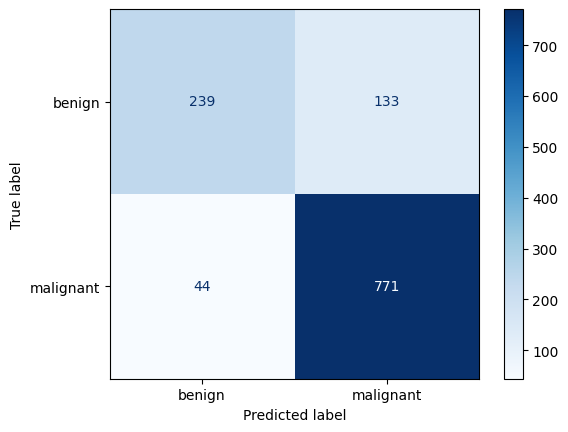

In [25]:
cm_dacl = confusion_matrix(y_true_dacl, y_pred_dacl)
disp_dacl = ConfusionMatrixDisplay(confusion_matrix=cm_dacl, display_labels=list(test_generator.class_indices.keys()))
disp_dacl.plot(cmap='Blues')

Class Weights

In [22]:
model_clw.evaluate(test_generator)

60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - accuracy: 0.8450 - auc_1: 0.9148 - loss: 0.3773 - precision_1: 0.9071 - recall_1: 0.8626


[0.37726110219955444,
 0.8449873924255371,
 0.8625766634941101,
 0.907096803188324,
 0.9148459434509277]

In [23]:
predictions_clw = model_clw.predict(test_generator)

60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 239ms/step


In [24]:
y_true_clw = test_generator.classes  #Actual Labels
y_pred_clw = np.where(predictions_clw > 0.5, 1, 0)  #Predicted labels at a 0.5 threhol

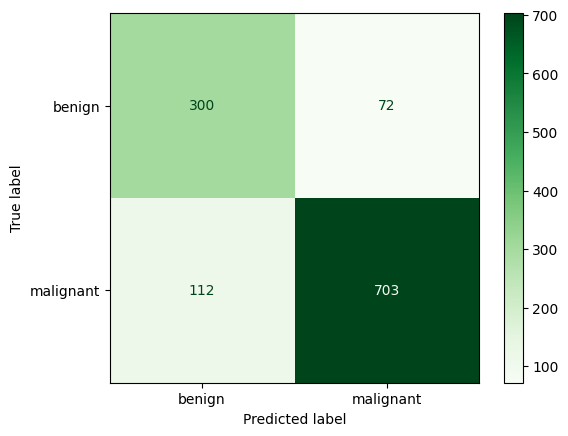

In [27]:
cm_clw = confusion_matrix(y_true_clw, y_pred_clw)
disp_clw = ConfusionMatrixDisplay(confusion_matrix=cm_clw, display_labels=list(test_generator.class_indices.keys()))
disp_clw.plot(cmap='Greens')

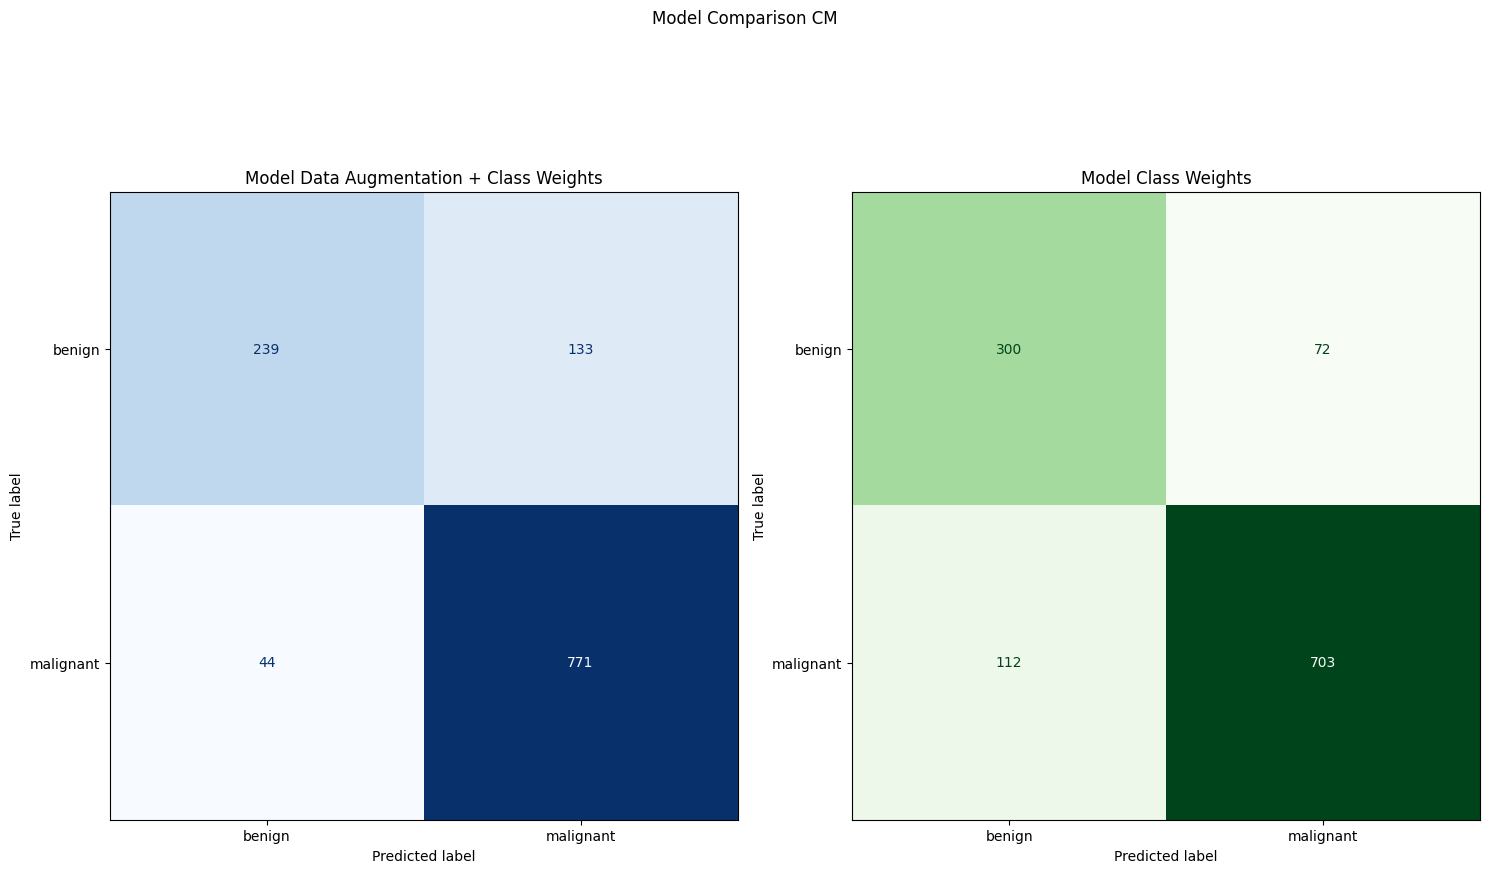

In [41]:
fig, axes = plt.subplots (nrows = 1, ncols=2, figsize =(15,10))

disp_dacl.plot(cmap = 'Blues', ax = axes[0], colorbar=False)
axes[0].set_title('Model Data Augmentation + Class Weights')

disp_clw.plot(cmap = 'Greens', ax = axes[1], colorbar=False)
axes[1].set_title('Model Class Weights')

fig.suptitle('Model Comparison CM')
plt.tight_layout()
plt.show()

In [39]:
fig.savefig("Model Comparison CM.png", dpi=300, bbox_inches='tight')

In [42]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score

In [44]:
metrics = {
    "Model": ["Class Weights", "Data Aug + Class Weights"],
    "Accuracy": [accuracy_score(y_true_clw, y_pred_clw), accuracy_score(y_true_dacl, y_pred_dacl)],
    "Recall": [recall_score(y_true_clw, y_pred_clw), recall_score(y_true_dacl, y_pred_dacl)],
    "Precision": [precision_score(y_true_clw, y_pred_clw), precision_score(y_true_dacl, y_pred_dacl)],
    "AUC": [roc_auc_score(y_true_clw, y_pred_clw), roc_auc_score(y_true_dacl, y_pred_dacl)]
}

In [ ]:
df_metrics = pd.DataFrame(metrics)

In [47]:
df_metrics

,Model,Accuracy,Recall,Precision,AUC
0,Class Weights,0.844987,0.862577,0.907097,0.834514
1,Data Aug + Class Weights,0.850885,0.946012,0.852876,0.794243
